In [1]:
import numpy as np
import cvxpy as cvx
from copy import copy

from pympc.geometry.polytope import Polytope
import matplotlib.pyplot as plt

In [2]:
def maximum_volume_simplex_inscribed_polytope(A, b):
    n, m = A.shape
    S = cvx.Variable(m, m)
    v = cvx.Variable(m, m+1)
    objective = cvx.Maximize(cvx.log_det(S))
    distance_vertices = [v[:,i+1] - v[:,0] == S[:,i] for i in range(m)]
    vertices_in_polyhedron = [A*v[:,i] <= b for i in range(m+1)]
    prob = cvx.Problem(objective, distance_vertices + vertices_in_polyhedron)
    result = prob.solve()
    v = v.value
    return v

In [3]:
def maximum_volume_simplex_inscribed_polytope_2(A, b):
    n, m = A.shape
    S = cvx.Variable(m, m)
    v = cvx.Variable(m, 1)
    objective = cvx.Maximize(cvx.log_det(S))
    standard_simplex = [-np.ones((m, 1))] + [np.zeros((m, 1)) for i in range(m)]
    for i in range(m):
        standard_simplex[i+1][i,0] = 1.
    vertices_in_polyhedron = [A*(S*standard_simplex[i] + v) <= b for i in range(m+1)]
    prob = cvx.Problem(objective, vertices_in_polyhedron)
    result = prob.solve(solver=cvx.SCS)
    S = np.array(S.value)
    v = np.array(v.value)
    print standard_simplex
    vertices = [S.dot(e_i)+v for e_i in standard_simplex]
    return vertices

In [4]:
n_var = 2
n_cons = 10
A = np.random.randn(n_cons, n_var)
b = np.random.rand(n_cons, 1)
v = maximum_volume_simplex_inscribed_polytope(copy(A), copy(b))

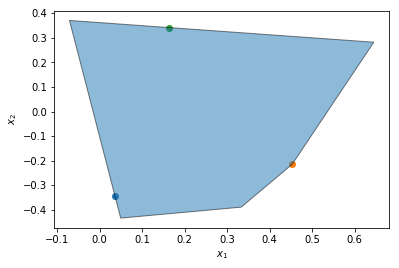

In [5]:
p = Polytope(A, b)
p.assemble()
p.plot(alpha=.5)
for i in range(v.shape[1]):
    plt.scatter(v[0,i], v[1,i])
plt.show()

[array([[-1.],
       [-1.]]), array([[ 1.],
       [ 0.]]), array([[ 0.],
       [ 1.]])]


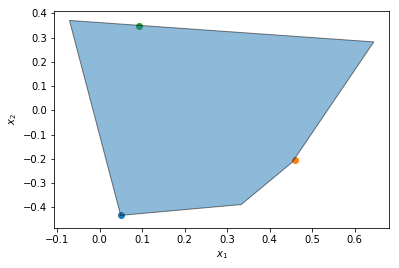

In [6]:
vertices = maximum_volume_simplex_inscribed_polytope_2(copy(A), copy(b))
p = Polytope(A, b)
p.assemble()
p.plot(alpha=.5)
for v in vertices:
    plt.scatter(v[0,0], v[1,0])
plt.show()

In [7]:
cvx.installed_solvers()

['CVXOPT',
 'MOSEK',
 'ECOS_BB',
 'GLPK_MI',
 'SCS',
 'ECOS',
 'GUROBI',
 'GLPK',
 'LS']

In [8]:
vertices

[array([[ 0.04965185],
        [-0.43235093]]), array([[ 0.45926156],
        [-0.20307301]]), array([[ 0.09266893],
        [ 0.34946224]])]